In [3]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d safiullah007/leaf-disease

# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

 99% 1.99G/2.01G [00:29<00:00, 96.4MB/s]
100% 2.01G/2.01G [00:29<00:00, 71.8MB/s]


20 epoch 57% accuracy

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [11]:

model = keras.models.load_model('/content/drive/MyDrive/Deep learning model/4_crop_20_epoch_57%acc/4crop-Cnn-model-20epochs.h5')



In [31]:
def prediction():
  predicted_Output = ['Cashew_anthracnose', 'Cashew_gumosis', 'Cashew_healthy', 'Cashew_leaf miner', 'Cashew_red rust',
                      'Cassava_bacterial blight', 'Cassava_brown spot', 'Cassava_green mite', 'Cassava_healthy', 'Cassava_mosaic',
                      'Maize_fall armyworm', 'Maize_grasshoper', 'Maize_healthy', 'Maize_leaf beetle', 'Maize_leaf blight', 'Maize_leaf spot', 'Maize_streak virus',
                      'Tomato_healthy', 'Tomato_leaf blight', 'Tomato_leaf curl', 'Tomato_septoria leaf spot', 'Tomato_verticulium wilt']
  input_image_path = input("Give the image path :")
  img = cv2.imread(input_image_path)
  img = cv2.resize(img,(150,150))
  img_array = np.array(img)
  img_array = img_array.reshape(1,150,150,3)

  from tensorflow.keras.preprocessing import image
  plt.figure(figsize=(4,3))
  img = image.load_img(input_image_path)
  plt.imshow(img,interpolation='nearest')
  plt.axis('off')
  plt.show()

  a=model.predict(img_array)
  print("Probability ->")
  for i, probability in enumerate(a[0]):
        print(f"{predicted_Output[i]}: {probability:.4f}")
  indices = a.argmax()
  print(indices)
  print(predicted_Output[indices])

Give the image path :/content/CCMT Dataset/CCMT Dataset/Cashew/gumosis/gumosis102_.jpg


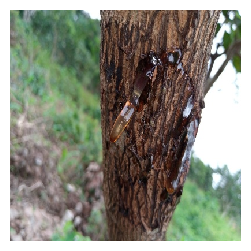

1/1 [==============================] - 0s 72ms/step
Probability ->
Cashew_anthracnose: 0.0084
Cashew_gumosis: 0.5390
Cashew_healthy: 0.1052
Cashew_leaf miner: 0.1080
Cashew_red rust: 0.0000
Cassava_bacterial blight: 0.1412
Cassava_brown spot: 0.0021
Cassava_green mite: 0.0000
Cassava_healthy: 0.0000
Cassava_mosaic: 0.0000
Maize_fall armyworm: 0.0328
Maize_grasshoper: 0.0229
Maize_healthy: 0.0000
Maize_leaf beetle: 0.0102
Maize_leaf blight: 0.0030
Maize_leaf spot: 0.0000
Maize_streak virus: 0.0001
Tomato_healthy: 0.0001
Tomato_leaf blight: 0.0150
Tomato_leaf curl: 0.0005
Tomato_septoria leaf spot: 0.0022
Tomato_verticulium wilt: 0.0093
1
Cashew_gumosis
Give the image path :/content/CCMT Dataset/CCMT Dataset/Cashew/leaf miner/leaf miner1003_.jpg


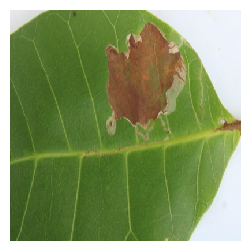

1/1 [==============================] - 0s 70ms/step
Probability ->
Cashew_anthracnose: 0.0997
Cashew_gumosis: 0.0001
Cashew_healthy: 0.0034
Cashew_leaf miner: 0.8746
Cashew_red rust: 0.0014
Cassava_bacterial blight: 0.0149
Cassava_brown spot: 0.0020
Cassava_green mite: 0.0003
Cassava_healthy: 0.0001
Cassava_mosaic: 0.0016
Maize_fall armyworm: 0.0001
Maize_grasshoper: 0.0001
Maize_healthy: 0.0000
Maize_leaf beetle: 0.0003
Maize_leaf blight: 0.0004
Maize_leaf spot: 0.0001
Maize_streak virus: 0.0001
Tomato_healthy: 0.0000
Tomato_leaf blight: 0.0002
Tomato_leaf curl: 0.0000
Tomato_septoria leaf spot: 0.0006
Tomato_verticulium wilt: 0.0001
3
Cashew_leaf miner
Give the image path :/content/CCMT Dataset/CCMT Dataset/Cassava/mosaic/mosaic1003_.jpg


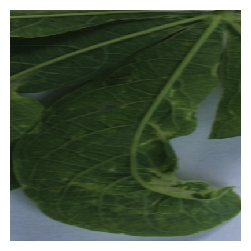

1/1 [==============================] - 0s 76ms/step
Probability ->
Cashew_anthracnose: 0.0207
Cashew_gumosis: 0.0000
Cashew_healthy: 0.0402
Cashew_leaf miner: 0.0021
Cashew_red rust: 0.0028
Cassava_bacterial blight: 0.0520
Cassava_brown spot: 0.0132
Cassava_green mite: 0.0128
Cassava_healthy: 0.0144
Cassava_mosaic: 0.2918
Maize_fall armyworm: 0.0028
Maize_grasshoper: 0.0157
Maize_healthy: 0.1367
Maize_leaf beetle: 0.2686
Maize_leaf blight: 0.0024
Maize_leaf spot: 0.0615
Maize_streak virus: 0.0400
Tomato_healthy: 0.0182
Tomato_leaf blight: 0.0004
Tomato_leaf curl: 0.0011
Tomato_septoria leaf spot: 0.0026
Tomato_verticulium wilt: 0.0000
9
Cassava_mosaic
Give the image path :/content/CCMT Dataset/CCMT Dataset/Maize/fall armyworm/fall armyworm102_.jpg


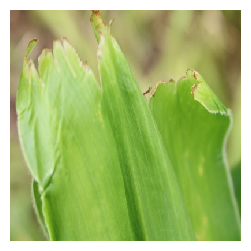

1/1 [==============================] - 0s 68ms/step
Probability ->
Cashew_anthracnose: 0.0119
Cashew_gumosis: 0.0001
Cashew_healthy: 0.0138
Cashew_leaf miner: 0.0015
Cashew_red rust: 0.0004
Cassava_bacterial blight: 0.0139
Cassava_brown spot: 0.0410
Cassava_green mite: 0.0021
Cassava_healthy: 0.0012
Cassava_mosaic: 0.0104
Maize_fall armyworm: 0.3178
Maize_grasshoper: 0.0298
Maize_healthy: 0.0315
Maize_leaf beetle: 0.0810
Maize_leaf blight: 0.0533
Maize_leaf spot: 0.3287
Maize_streak virus: 0.0399
Tomato_healthy: 0.0021
Tomato_leaf blight: 0.0008
Tomato_leaf curl: 0.0017
Tomato_septoria leaf spot: 0.0170
Tomato_verticulium wilt: 0.0000
15
Maize_leaf spot
Give the image path :/content/CCMT Dataset/CCMT Dataset/Maize/fall armyworm/fall armyworm106_.jpg


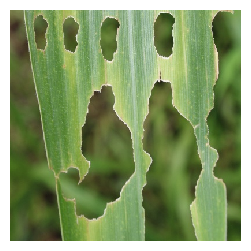

1/1 [==============================] - 0s 112ms/step
Probability ->
Cashew_anthracnose: 0.1159
Cashew_gumosis: 0.0024
Cashew_healthy: 0.0377
Cashew_leaf miner: 0.0083
Cashew_red rust: 0.0029
Cassava_bacterial blight: 0.1458
Cassava_brown spot: 0.1349
Cassava_green mite: 0.0099
Cassava_healthy: 0.0199
Cassava_mosaic: 0.0484
Maize_fall armyworm: 0.0618
Maize_grasshoper: 0.0159
Maize_healthy: 0.0042
Maize_leaf beetle: 0.0127
Maize_leaf blight: 0.0152
Maize_leaf spot: 0.0808
Maize_streak virus: 0.0587
Tomato_healthy: 0.0147
Tomato_leaf blight: 0.0370
Tomato_leaf curl: 0.0386
Tomato_septoria leaf spot: 0.1282
Tomato_verticulium wilt: 0.0062
5
Cassava_bacterial blight


In [34]:
for i in range(5):
  prediction()
  i=i+1

**4_crop_50_epoch_49%acc**

In [35]:

model = keras.models.load_model('/content/drive/MyDrive/Deep learning model/4_crop_50_epoch_49%acc/crop-Cnn-model-50epochs.h5')



Give the image path :/content/CCMT Dataset/CCMT Dataset/Cashew/gumosis/gumosis103_.jpg


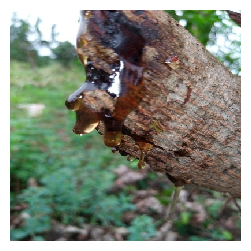

1/1 [==============================] - 0s 339ms/step
Probability ->
Cashew_anthracnose: 0.0001
Cashew_gumosis: 0.9933
Cashew_healthy: 0.0022
Cashew_leaf miner: 0.0004
Cashew_red rust: 0.0002
Cassava_bacterial blight: 0.0002
Cassava_brown spot: 0.0000
Cassava_green mite: 0.0000
Cassava_healthy: 0.0000
Cassava_mosaic: 0.0000
Maize_fall armyworm: 0.0003
Maize_grasshoper: 0.0015
Maize_healthy: 0.0000
Maize_leaf beetle: 0.0010
Maize_leaf blight: 0.0007
Maize_leaf spot: 0.0000
Maize_streak virus: 0.0000
Tomato_healthy: 0.0000
Tomato_leaf blight: 0.0000
Tomato_leaf curl: 0.0001
Tomato_septoria leaf spot: 0.0000
Tomato_verticulium wilt: 0.0000
1
Cashew_gumosis
Give the image path :/content/CCMT Dataset/CCMT Dataset/Cassava/brown spot/brown spot1004_.jpg


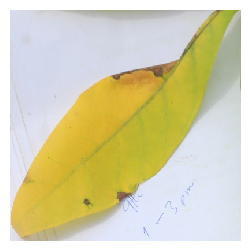

1/1 [==============================] - 0s 80ms/step
Probability ->
Cashew_anthracnose: 0.0000
Cashew_gumosis: 0.0000
Cashew_healthy: 0.0000
Cashew_leaf miner: 0.0000
Cashew_red rust: 0.0000
Cassava_bacterial blight: 0.0012
Cassava_brown spot: 0.9935
Cassava_green mite: 0.0006
Cassava_healthy: 0.0021
Cassava_mosaic: 0.0000
Maize_fall armyworm: 0.0000
Maize_grasshoper: 0.0000
Maize_healthy: 0.0000
Maize_leaf beetle: 0.0000
Maize_leaf blight: 0.0000
Maize_leaf spot: 0.0004
Maize_streak virus: 0.0004
Tomato_healthy: 0.0000
Tomato_leaf blight: 0.0017
Tomato_leaf curl: 0.0000
Tomato_septoria leaf spot: 0.0000
Tomato_verticulium wilt: 0.0000
6
Cassava_brown spot
Give the image path :/content/CCMT Dataset/CCMT Dataset/Maize/grasshoper/grasshoper144_.jpg


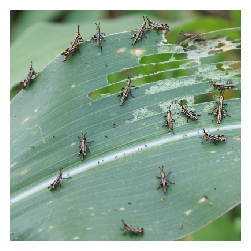

1/1 [==============================] - 0s 79ms/step
Probability ->
Cashew_anthracnose: 0.1363
Cashew_gumosis: 0.0005
Cashew_healthy: 0.0543
Cashew_leaf miner: 0.0145
Cashew_red rust: 0.0560
Cassava_bacterial blight: 0.0864
Cassava_brown spot: 0.0209
Cassava_green mite: 0.0912
Cassava_healthy: 0.0274
Cassava_mosaic: 0.0189
Maize_fall armyworm: 0.0184
Maize_grasshoper: 0.0794
Maize_healthy: 0.0175
Maize_leaf beetle: 0.0089
Maize_leaf blight: 0.0344
Maize_leaf spot: 0.2378
Maize_streak virus: 0.0323
Tomato_healthy: 0.0072
Tomato_leaf blight: 0.0028
Tomato_leaf curl: 0.0020
Tomato_septoria leaf spot: 0.0525
Tomato_verticulium wilt: 0.0002
15
Maize_leaf spot
Give the image path :/content/CCMT Dataset/CCMT Dataset/Tomato/healthy/healthy102_.jpg


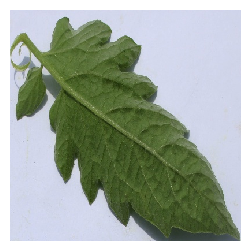

1/1 [==============================] - 0s 137ms/step
Probability ->
Cashew_anthracnose: 0.0000
Cashew_gumosis: 0.0000
Cashew_healthy: 0.0000
Cashew_leaf miner: 0.0000
Cashew_red rust: 0.0000
Cassava_bacterial blight: 0.0000
Cassava_brown spot: 0.0000
Cassava_green mite: 0.0000
Cassava_healthy: 0.0000
Cassava_mosaic: 0.0001
Maize_fall armyworm: 0.0000
Maize_grasshoper: 0.0000
Maize_healthy: 0.0000
Maize_leaf beetle: 0.0000
Maize_leaf blight: 0.0000
Maize_leaf spot: 0.0000
Maize_streak virus: 0.0000
Tomato_healthy: 0.9969
Tomato_leaf blight: 0.0012
Tomato_leaf curl: 0.0000
Tomato_septoria leaf spot: 0.0018
Tomato_verticulium wilt: 0.0000
17
Tomato_healthy
Give the image path :/content/CCMT Dataset/CCMT Dataset/Tomato/verticulium wilt/leaf blight915_.jpg


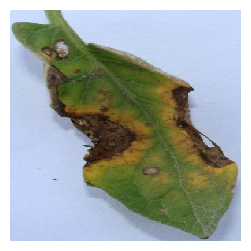

1/1 [==============================] - 0s 122ms/step
Probability ->
Cashew_anthracnose: 0.0626
Cashew_gumosis: 0.0001
Cashew_healthy: 0.0077
Cashew_leaf miner: 0.0004
Cashew_red rust: 0.0003
Cassava_bacterial blight: 0.0026
Cassava_brown spot: 0.0001
Cassava_green mite: 0.0000
Cassava_healthy: 0.0000
Cassava_mosaic: 0.0002
Maize_fall armyworm: 0.0000
Maize_grasshoper: 0.0000
Maize_healthy: 0.0000
Maize_leaf beetle: 0.0001
Maize_leaf blight: 0.0000
Maize_leaf spot: 0.0000
Maize_streak virus: 0.0000
Tomato_healthy: 0.0000
Tomato_leaf blight: 0.0045
Tomato_leaf curl: 0.0082
Tomato_septoria leaf spot: 0.0005
Tomato_verticulium wilt: 0.9125
21
Tomato_verticulium wilt


In [36]:
for i in range(5):
  prediction()
  i=i+1